# LR ex1- univariate linear regression

预测Population和Profit之间的关系

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

读取数据

In [2]:
data = pd.read_csv('ex1data1.txt',header=None,names=['Population','Profit'])

In [3]:
data.head()  # head(n)选取前n行数据。没有print语句只是选取，不打印。默认选取前5行

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [4]:
data.describe()   # describe()返回数据的统计变量（均值，最大最小值等）

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


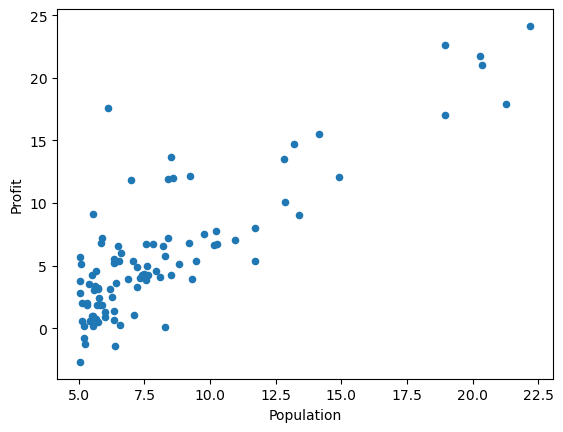

In [5]:
data.plot(kind='scatter',x='Population',y='Profit')  # 画出散点图
plt.show()

加一列全为1的数据

In [6]:
data.insert(0,'Ones',1)

In [7]:
data.head()

,Ones,Population,Profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


选中变量X和Y的数据矩阵

In [8]:
cols = data.shape[1]   # shape()返回(行数，列数)
X = data.iloc[:,0:cols-1]   # iloc[a:b,c:d]选中a到b行，c到d-1列
X.head()

,Ones,Population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [9]:
Y = data.iloc[:,cols-1:cols]
Y.head()

,Profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


In [10]:
X = np.matrix(X.values)
Y = np.matrix(Y.values)
theta = np.matrix([0,0])

In [11]:
X.shape, Y.shape, theta.shape

((97, 2), (97, 1), (1, 2))

代价函数

In [12]:
def costFunction(X,Y,theta):    # 代价函数
    inner = np.power((X*theta.T)-Y,2)    # theta.T：转置
    return np.sum((inner)/(2*len(X)))

梯度下降

In [13]:
def gradientDescent(X,Y,theta,alpha,iters):   # 梯度下降
    temp = np.matrix(np.zeros(theta.shape))
    param = int(theta.shape[1])
    cost = np.zeros(iters)
    for i in range(iters):
        error = X*theta.T-Y
        for j in range(param):
            term = np.multiply(error,X[:,j])
            temp[0,j] = temp[0,j]-alpha/len(X)*np.sum(term)
        theta = temp
        cost[i]=costFunction(X,Y,theta)
    return theta,cost



In [14]:
g,cost = gradientDescent(X,Y,theta,alpha=0.01,iters=1000)

x = np.linspace(data.Population.min(),data.Population.max(),100)
f = g[0,0]+g[0,1]*x   # 预测函数

print('theta0=',g[0,0])
print('theta1=',g[0,1])

theta0= -3.241402144274422
theta1= 1.1272942024281842


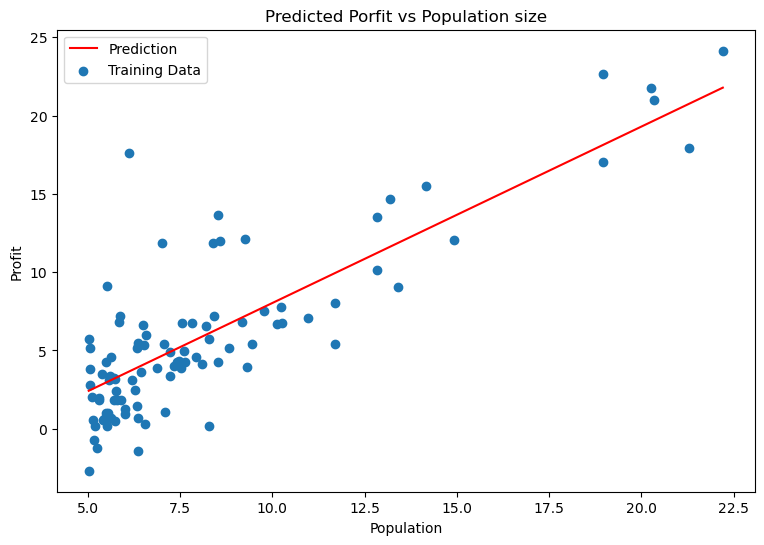

In [15]:
plt.figure(figsize=(9,6))
plt.xlabel('Population')
plt.ylabel('Profit')
l1=plt.plot(x,f,label='Prediction',color='red')  # 画预测函数
l2=plt.scatter(data.Population,data.Profit,label='Training Data')   # 画原始数据散点图
plt.legend(loc='best')
plt.title('Predicted Porfit vs Population size')
plt.show()